In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
params={'figure.figsize': [8,6], 
        'figure.dpi' : 150,
        'axes.labelsize': 'large'
        }
plt.rcParams.update(params)

import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid', palette='dark')

In [3]:
data=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Let's remove CustomerID column
data.drop('CustomerID', axis=1, inplace=True)

In [7]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Let's check the distribution of the features

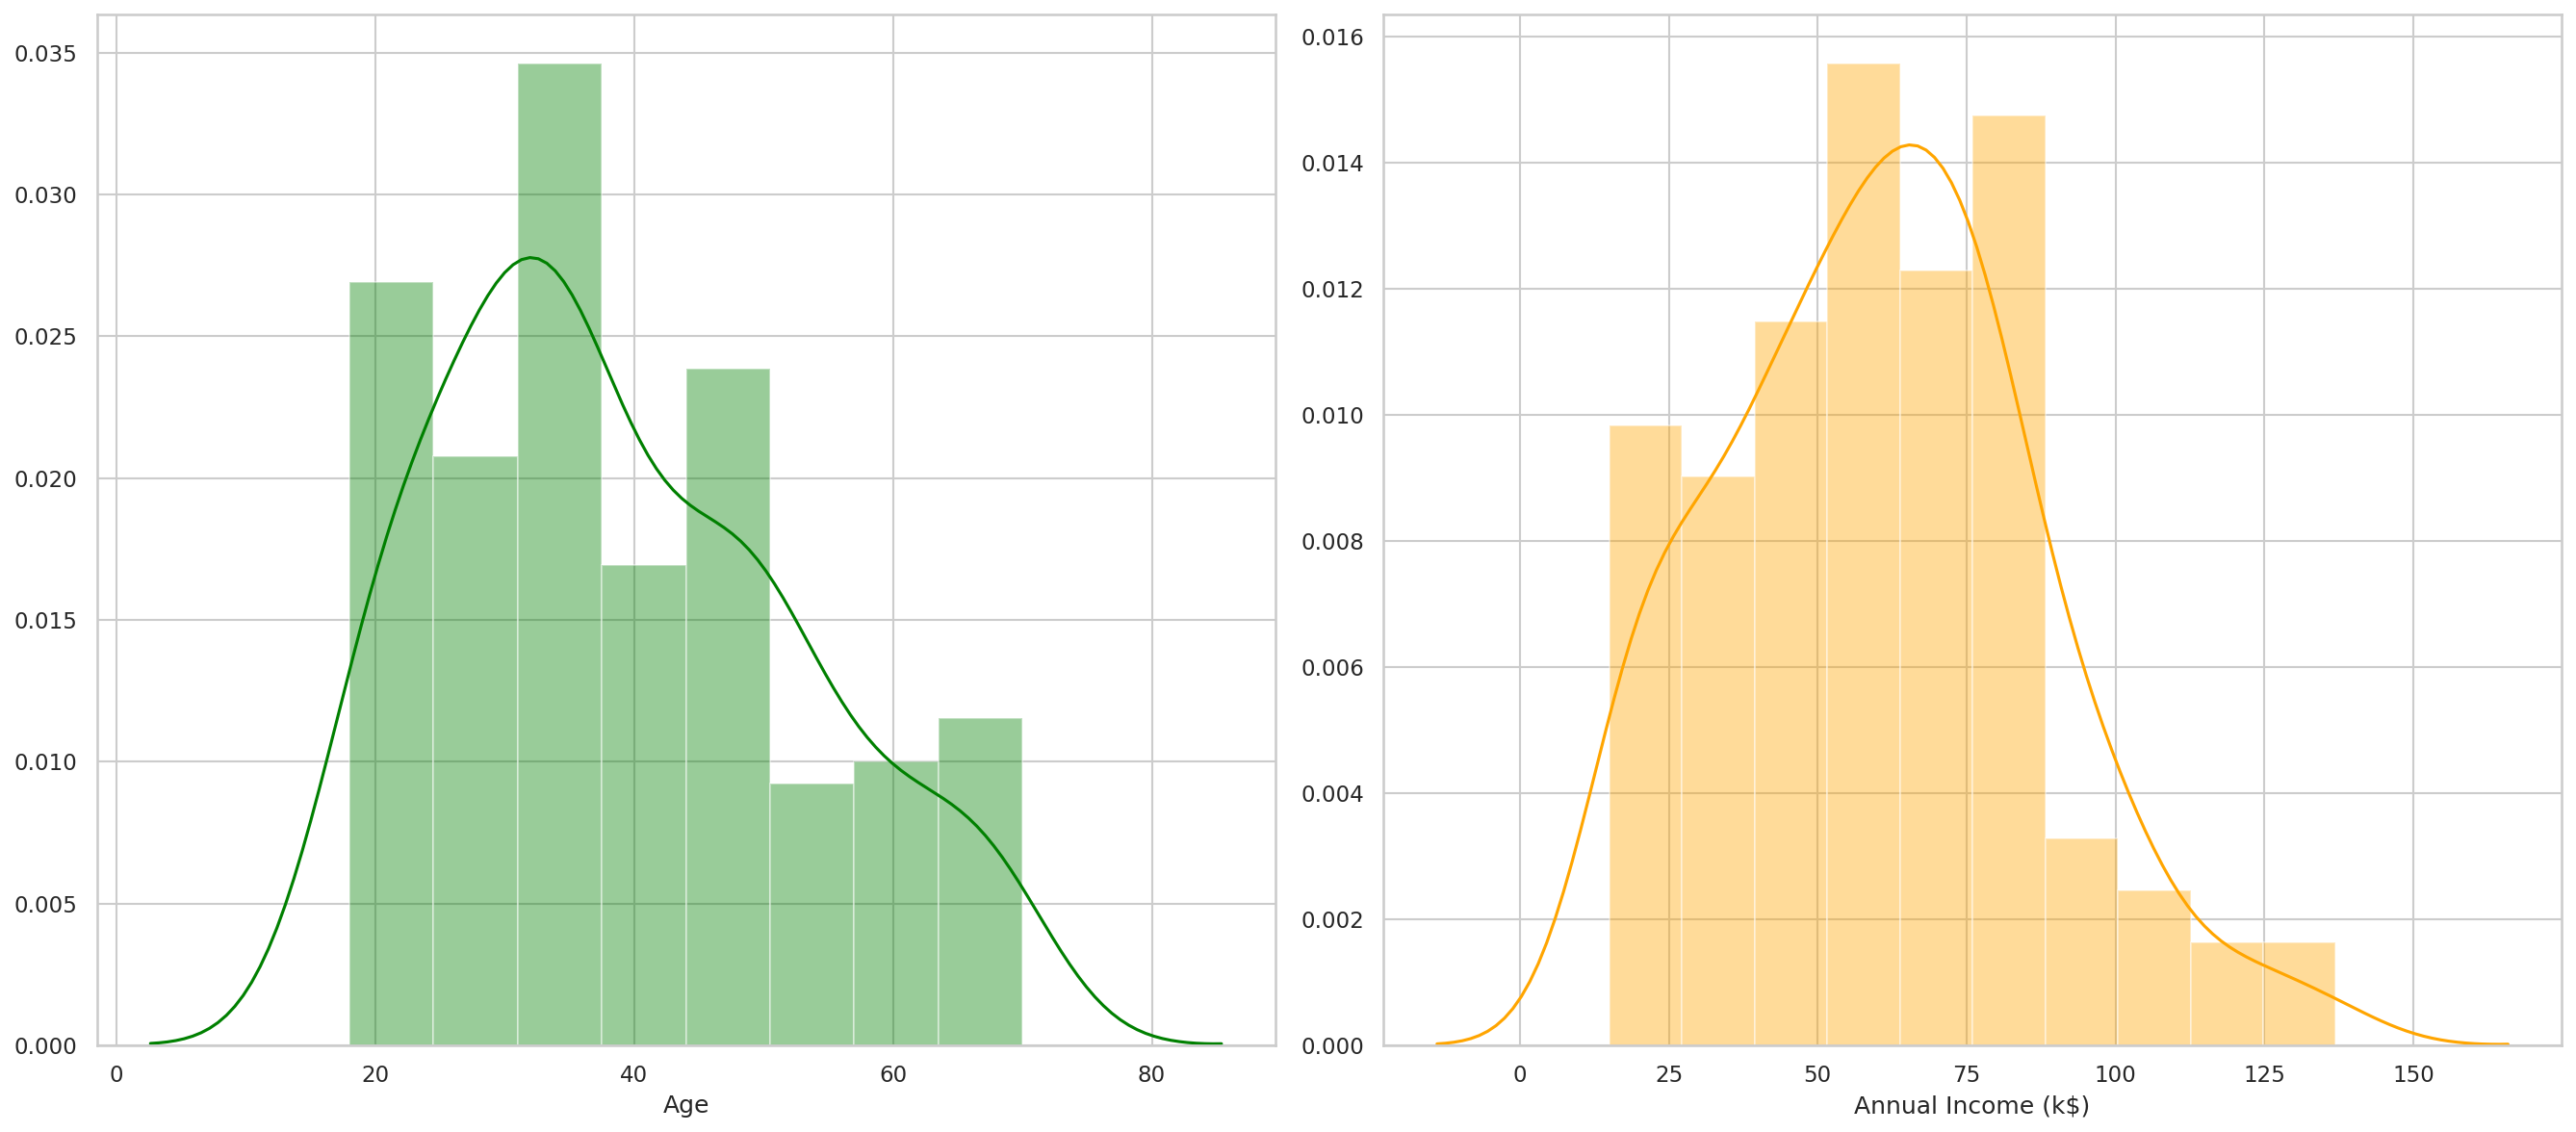

In [8]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.distplot(data['Age'], color='green')

plt.subplot(1,2,2)
sns.distplot(data['Annual Income (k$)'], color='orange')
plt.tight_layout()

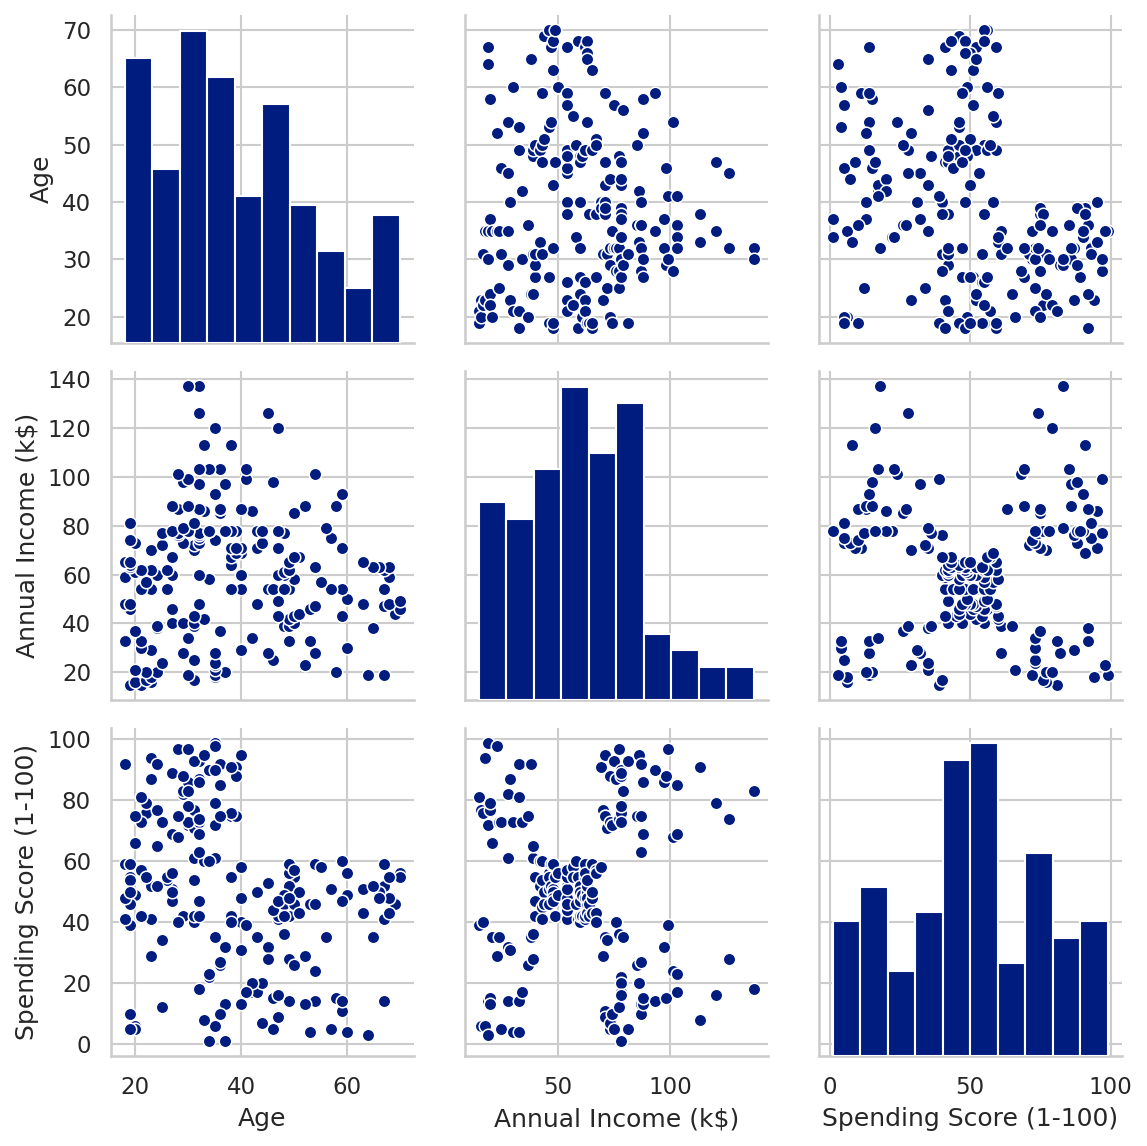

In [9]:
sns.pairplot(data)

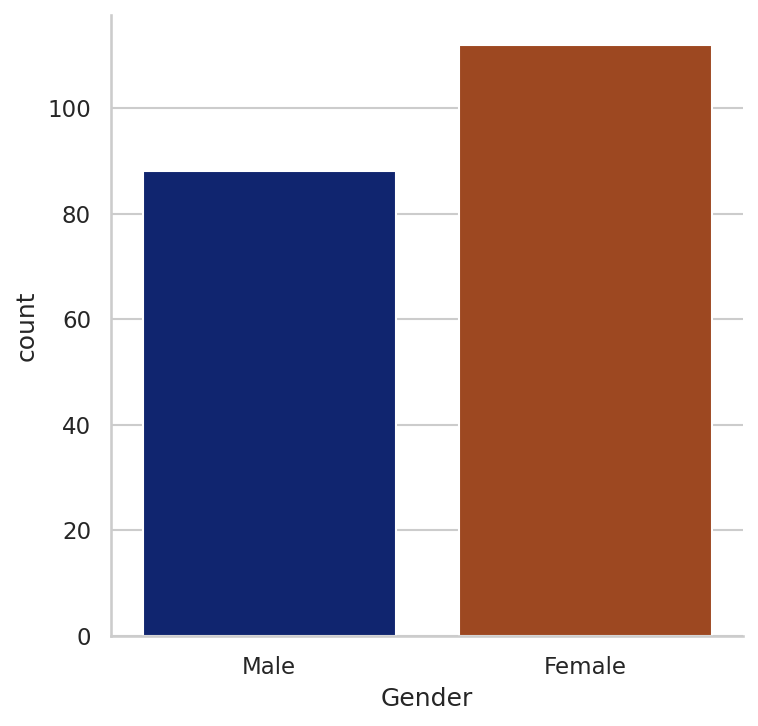

In [10]:
sns.catplot('Gender',data=data, kind='count')

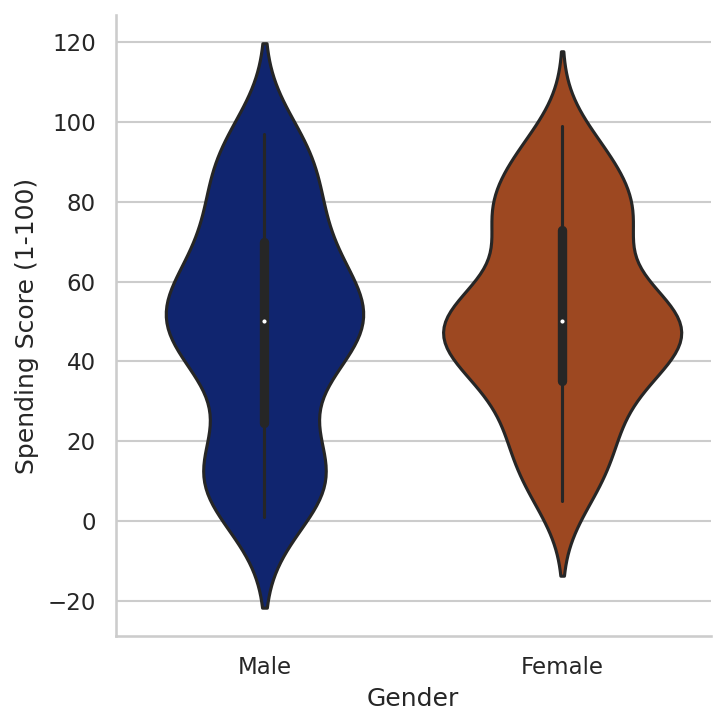

In [11]:
sns.catplot('Gender', 'Spending Score (1-100)', data=data, kind='violin')

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
# Let's encode the data
data=pd.get_dummies(data, drop_first=True)

In [14]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [16]:
data_tx=StandardScaler().fit_transform(data)

Let's check best K using elbow method

In [17]:
k_inertia=[]

for i in range(1, 11):
    km=KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(data_tx)
    k_inertia.append(km.inertia_)
    

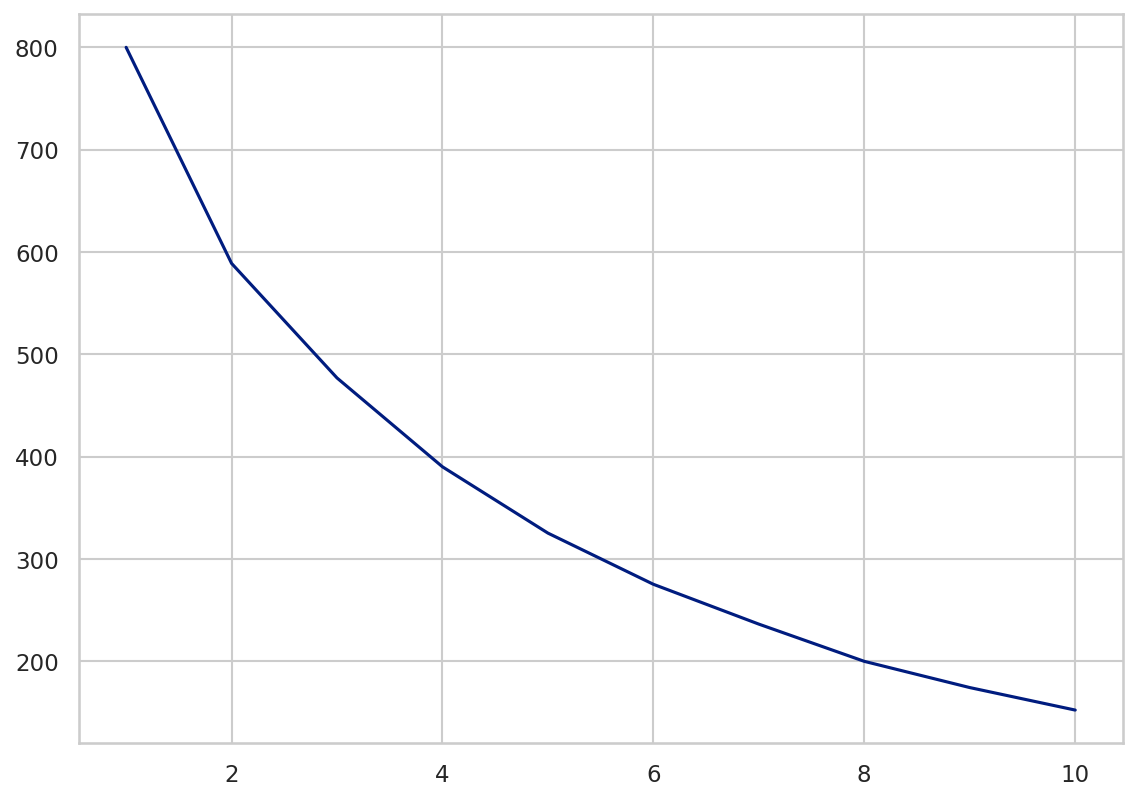

In [18]:
plt.plot(range(1,11), k_inertia)

In [19]:
# as seen above no. of clusters should be either 4 or 5

In [20]:
km=KMeans(n_clusters=5)

In [21]:
km.fit(data_tx)

KMeans(n_clusters=5)

In [22]:
cluster_centers=km.cluster_centers_
cluster_centers

array([[ 1.20414253, -0.29510422, -0.54350185,  1.12815215],
       [-0.75387645,  0.00916066,  0.71643426, -0.88640526],
       [-0.76072691,  0.05496398,  0.83369302,  1.12815215],
       [-0.07756323,  1.17949408, -1.32321797,  0.12087344],
       [ 0.72190766, -0.52364987, -0.43921302, -0.88640526]])

In [23]:
clusters=km.predict(data_tx)
clusters

array([2, 2, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1, 4, 1, 0, 2, 4, 2, 0, 1, 0, 2,
       4, 2, 4, 2, 4, 2, 4, 1, 0, 1, 0, 2, 4, 1, 4, 1, 4, 1, 4, 2, 0, 1,
       4, 1, 4, 1, 1, 4, 4, 2, 1, 0, 4, 0, 4, 0, 1, 0, 0, 2, 4, 4, 0, 2,
       4, 4, 2, 1, 0, 4, 4, 4, 0, 2, 4, 0, 1, 4, 0, 2, 0, 4, 1, 0, 4, 1,
       1, 4, 4, 2, 0, 4, 1, 2, 4, 1, 0, 2, 1, 4, 0, 2, 0, 1, 4, 0, 0, 0,
       0, 1, 4, 2, 1, 1, 4, 4, 4, 4, 2, 4, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 3, 1, 3, 2, 3, 1, 4, 2, 1, 1, 3, 2, 0, 1, 3, 2, 3, 2, 3, 1,
       3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 0, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 2], dtype=int32)

#### Let's reduce the dimensions of the data

In [24]:
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(data_tx)

In [25]:
reduced_data

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [26]:
reduced_data.shape, data.shape, clusters.shape

((200, 2), (200, 4), (200,))

In [27]:
reduced_data=pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [28]:
reduced_data['clusters']=clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,4
3,-1.694513,-1.631908,1
4,-0.313108,-1.810483,4


In [29]:
reduced_data['clusters'].value_counts()

1    55
4    44
2    40
0    35
3    26
Name: clusters, dtype: int64

Let's plot the data and visualize the number of clusters

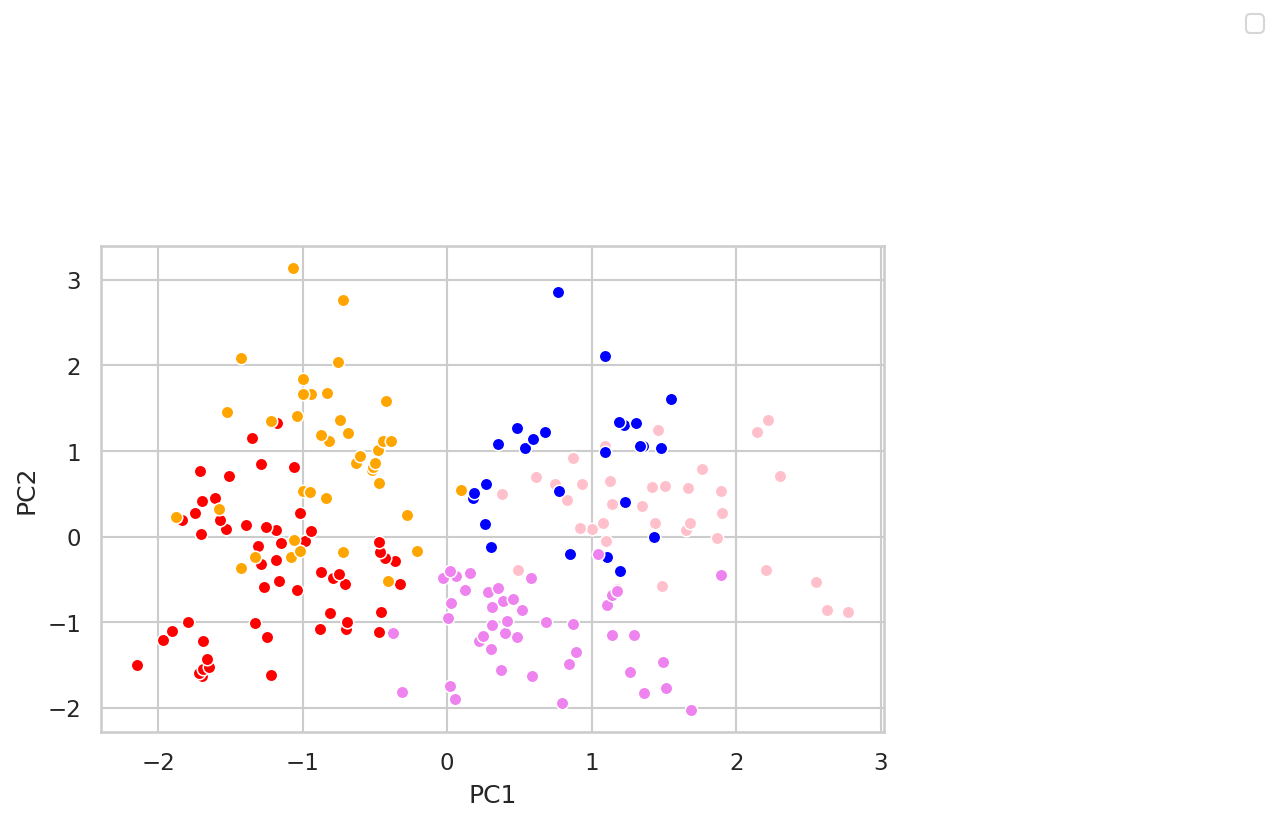

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==0, 'PC1'], reduced_data.loc[reduced_data['clusters']==0, 'PC2'],color='pink')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==1, 'PC1'], reduced_data.loc[reduced_data['clusters']==1, 'PC2'],color='red')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==2, 'PC1'], reduced_data.loc[reduced_data['clusters']==2, 'PC2'],color='orange')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==3, 'PC1'], reduced_data.loc[reduced_data['clusters']==3, 'PC2'],color='blue')
sns.scatterplot(reduced_data.loc[reduced_data['clusters']==4, 'PC1'], reduced_data.loc[reduced_data['clusters']==4, 'PC2'],color='violet')

plt.legend(loc='best', bbox_to_anchor=(1.5, 1.5))
plt.show()